### Deep Learning Project: Pet Classifier using CNN

### Created on 01-09-2019
### Author: Anishka V Patel
anishka.vpatel@gamil.com

<a id='content-table'></a>
### Table of Content
1 - [Import modules](#import-modules)<br>
2 - [Define constants](#define-constants)<br>
3 - [Preparing the training data](#prepare-train-data)<br>
4 - [Preparing the model](#prepare-model)<br>
5 - [Preparing validation data](#prepare-val-data)<br>
6 - [Preparing training data input stream](#prepare-input-stream)<br>
7 - [Training the classification model](#training-model)<br>
8 - [Saving the trained model](#saving-model)<br>
9 - [Visualising loss and accuracy](#loss-accu-visual)<br>
10 - [Preparing test data](#prepare-test-data)<br>
11 - [Making prediction over test dataset](#predictions)<br>
12 - [Visualising the predicted outcomes](#predictions-visuals)<br>
13 - [Brief Comment over inaccuracies](#comment)

<a id='import-modules'></a>
### Import modules

[Table of Content](#content-table)

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Using TensorFlow backend.


<a id='define-constants'></a>
### Define Constants

[Table of Content](#content-table)

In [2]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3
TRAIN_DIR = './data/train'
TEST_DIR = './data/test'

<a id='prepare-train-data'></a>
### Preparing the training data

[Table of Content](#content-table)

Checking the folders

#### I have added more data from Kaggle dog vs cat link to train my model better.
#### But, I have retained the Simplilearn data.

In [3]:
folders = os.listdir(TRAIN_DIR)

In [4]:
folders

['cats', 'dogs']

In [5]:
catfiles = os.listdir(TRAIN_DIR + '/'+ folders[0])
catfiles

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jp

In [6]:
dogfiles = os.listdir(TRAIN_DIR+'/'+folders[1])
dogfiles

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.1000.jpg',
 'dog.10000.jpg',
 'dog.10001.jpg',
 'dog.10002.jpg',
 'dog.10003.jpg',
 'dog.10004.jpg',
 'dog.10005.jpg',
 'dog.10006.jpg',
 'dog.10007.jpg',
 'dog.10008.jpg',
 'dog.10009.jpg',
 'dog.1001.jpg',
 'dog.10010.jpg',
 'dog.10011.jpg',
 'dog.10012.jpg',
 'dog.10013.jpg',
 'dog.10014.jpg',
 'dog.10015.jpg',
 'dog.10016.jpg',
 'dog.10017.jpg',
 'dog.10018.jpg',
 'dog.10019.jpg',
 'dog.1002.jpg',
 'dog.10020.jpg',
 'dog.10021.jpg',
 'dog.10022.jpg',
 'dog.10023.jpg',
 'dog.10024.jpg',
 'dog.10025.jpg',
 'dog.10026.jpg',
 'dog.10027.jpg',
 'dog.10028.jpg',
 'dog.10029.jpg',
 'dog.1003.jpg',
 'dog.10030.jpg',
 'dog.10031.jpg',
 'dog.10032.jpg',
 'dog.10033.jpg',
 'dog.10034.jpg',
 'dog.10035.jpg',
 'dog.10036.jp

Preparing the dataframe

In [7]:
filenames = []
categories =[]
for file in catfiles:
    filenames.append(TRAIN_DIR + '/' + folders[0] + '/' + file)
    categories.append(1)
for file in dogfiles:
    filenames.append(TRAIN_DIR + '/' + folders[1] + '/' + file)
    categories.append(0)
df = pd.DataFrame({'filename': filenames, 
                  'category': categories})

Inspecting the dataframe

In [8]:
df.head()

,filename,category
0,./data/train/cats/1.jpg,1
1,./data/train/cats/10.jpg,1
2,./data/train/cats/11.jpg,1
3,./data/train/cats/12.jpg,1
4,./data/train/cats/13.jpg,1


In [9]:
df.tail()

,filename,category
25035,./data/train/dogs/dog.9995.jpg,0
25036,./data/train/dogs/dog.9996.jpg,0
25037,./data/train/dogs/dog.9997.jpg,0
25038,./data/train/dogs/dog.9998.jpg,0
25039,./data/train/dogs/dog.9999.jpg,0


Visualising the data distribution

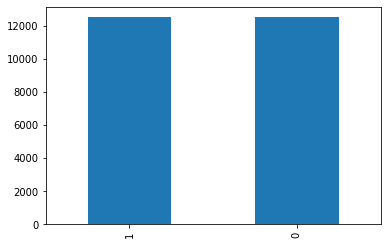

In [10]:
df['category'].value_counts().plot.bar()

Visualising a sample data

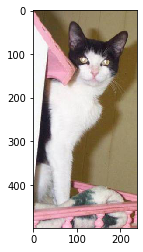

In [11]:
sample = random.choice(df['filename'])
image = load_img(sample)
plt.imshow(image)

<a id='prepare-model'></a>
### Preparing the model

[Table of Content](#content-table)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.layers import Activation, BatchNormalization

Model (Sequential)
- Layer 1
    - Conv2D (Filters = 32)
    - BatchNoramlization
    - MaxPooling2D
    - Dropout
- Layer 2
    - Conv2D (Filters = 64)
    - BatchNoramlization
    - MaxPooling2D
    - Dropout
- Layer 3
    - Conv2D (Filters = 128)
    - BatchNormalization
    - MaxPooling2D
    - Dropout
- Layer 4
    - Flatten
    - Dense (Node = 512)
    - BatchNormalization
    - Dropout
- Output Layer
    - Dense (Node = 2)

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, (3, 3), 
                 activation='relu', 
                 input_shape=(IMAGE_WIDTH, 
                              IMAGE_HEIGHT, 
                              IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [16]:
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

Preparing callbacks for model

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=5,
                                           verbose=1,
                                           factor=0.5)

earlystop = EarlyStopping(patience=15)

In [22]:
callbacks = [earlystop, learning_rate_reduction]

Changing Label data for better understanding

In [23]:
df['category'] = df['category'].replace({0: 'dog', 1:'cat'})

<a id='prepare-val-data'></a>
### Preparing validation data

[Table of Content](#content-table)

In [24]:
train_df, val_df = train_test_split(df, test_size=0.20, random_state=10)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

Data frequency of training dataset

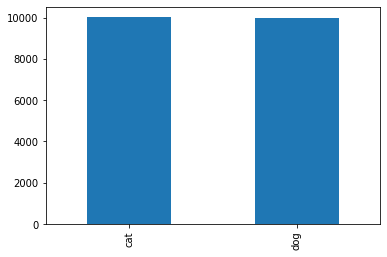

In [25]:
train_df['category'].value_counts().plot.bar()

Data frequency of validation dataset

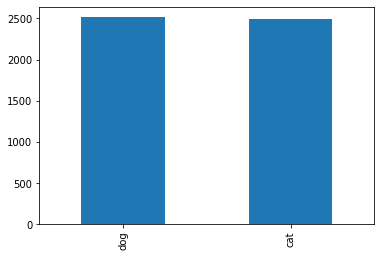

In [26]:
val_df['category'].value_counts().plot.bar()

<a id='prepare-input-stream'></a>
### Preparing training and validation data input stream

[Table of Content](#content-table)

In [27]:
total_train = train_df.shape[0]
total_val = val_df.shape[0]
batch_size = 32

In [28]:
train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(
        train_df,
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size)

Found 20032 validated image filenames belonging to 2 classes.


In [29]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
        val_df,
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size)

Found 5008 validated image filenames belonging to 2 classes.


In [30]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
        example_df,
        x_col='filename',
        y_col='category',
        traget_size=IMAGE_SIZE,
        class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


Visualising traing data input stream sample

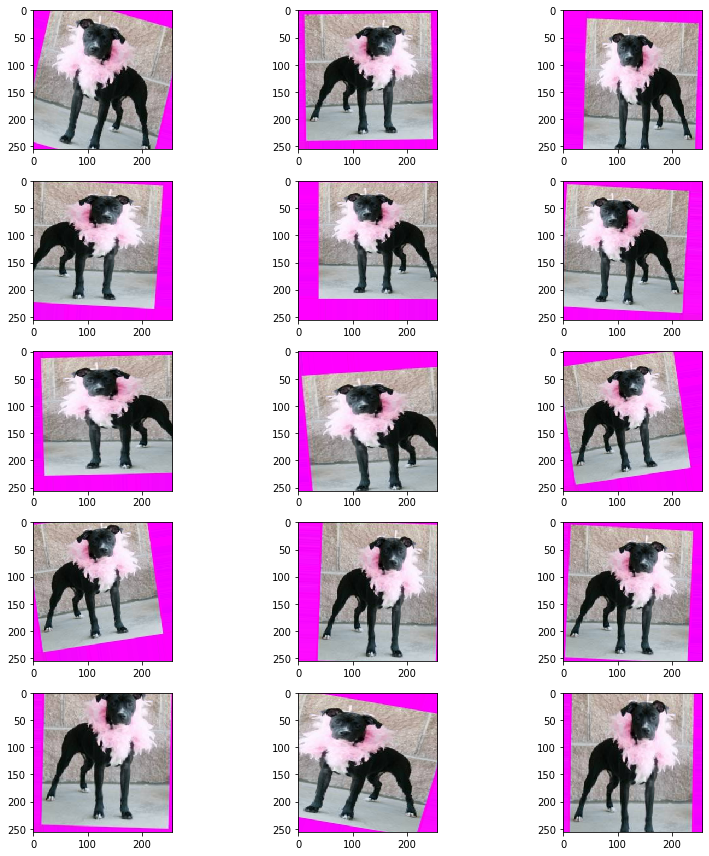

In [31]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<a id='training-model'></a>
### Training the classification model

[Table of Content](#content-table)

In [32]:
epochs = 100

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=total_val//batch_size,
        steps_per_epoch=total_train//batch_size,
        callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
626/626 [==============================] - 98s 156ms/step - loss: 0.7760 - acc: 0.6337 - val_loss: 0.5558 - val_acc: 0.7153
Epoch 2/100
626/626 [==============================] - 96s 154ms/step - loss: 0.5344 - acc: 0.7373 - val_loss: 0.4808 - val_acc: 0.7705
Epoch 3/100
626/626 [==============================] - 97s 154ms/step - loss: 0.4703 - acc: 0.7795 - val_loss: 0.5921 - val_acc: 0.7199
Epoch 4/100
626/626 [==============================] - 96s 154ms/step - loss: 0.4315 - acc: 0.8029 - val_loss: 0.5078 - val_acc: 0.7828
Epoch 5/100
626/626 [==============================] - 97s 154ms/step - loss: 0.4053 - acc: 0.8169 - val_loss: 0.6833 - val_acc: 0.7464
Epoch 6/100
626/626 [==============================] - 97s 155ms/step - loss: 0.3833 - acc: 0.8299 - val_loss: 0.3923 - val_acc: 0.8280
Epoch 7/100
626/626 [==============================] - 97s 155ms/step - loss: 0.3691 - acc: 0.8383 - val_loss: 0.3437 - val_acc: 0.8511


<a id='saving-model'></a>
### Saving the trained model

[Table of Content](#content-table)

In [63]:
model.save_weights('model_2.h5')

<a id='loss-accu-visual'></a>
### Visualising the training and validation, loss and accuracy over various epochs of training

[Table of Content](#content-table)

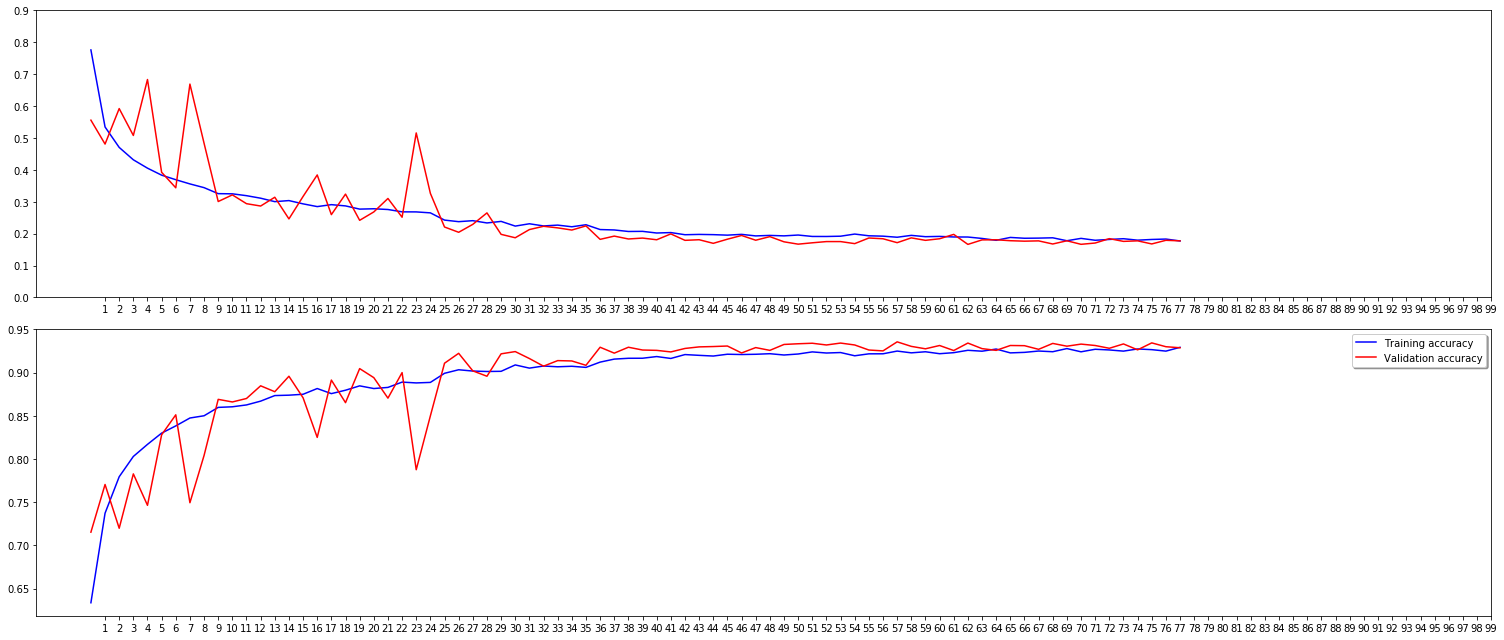

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 9))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

<a id='prepare-test-data'></a>
### Preparing the test data

[Table of Content](#content-table)

In [39]:
folders = os.listdir(TEST_DIR)

In [40]:
folders

['cats', 'dogs']

In [41]:
catfiles = os.listdir(TEST_DIR + '/' + folders[1])
catfiles

['101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg']

In [42]:
dogfiles = os.listdir(TEST_DIR + '/' + folders[0])
dogfiles

['101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg']

Preparing test dataframe

In [43]:
filenames = []
categories =[]
for file in catfiles:
    filenames.append(TEST_DIR + '/' + folders[0] + '/' + file)
    categories.append(1)
for file in dogfiles:
    filenames.append(TEST_DIR + '/' + folders[1] + '/' + file)
    categories.append(0)
df_test = pd.DataFrame({'filename': filenames, 
                  'category': categories})

In [44]:
df_test.head()

,filename,category
0,./data/test/cats/101.jpg,1
1,./data/test/cats/102.jpg,1
2,./data/test/cats/103.jpg,1
3,./data/test/cats/104.jpg,1
4,./data/test/cats/105.jpg,1


In [45]:
df_test.tail()

,filename,category
15,./data/test/dogs/106.jpg,0
16,./data/test/dogs/107.jpg,0
17,./data/test/dogs/108.jpg,0
18,./data/test/dogs/109.jpg,0
19,./data/test/dogs/110.jpg,0


Preparing test data input stream

In [47]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 20 validated image filenames.


<a id='predictions'></a>
### Making prediction over the test data

[Table of Content](#content-table)

In [49]:
predict = model.predict_generator(test_generator, steps=np.ceil(20/batch_size))

In [51]:
df_test['predicted'] = np.argmax(predict, axis=-1)

In [56]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
df_test['predicted'] = df_test['predicted'].replace(label_map)
df_test

,filename,category,predicted
0,./data/test/cats/101.jpg,1,cat
1,./data/test/cats/102.jpg,1,cat
2,./data/test/cats/103.jpg,1,cat
3,./data/test/cats/104.jpg,1,cat
4,./data/test/cats/105.jpg,1,cat
5,./data/test/cats/106.jpg,1,cat
6,./data/test/cats/107.jpg,1,cat
7,./data/test/cats/108.jpg,1,cat
8,./data/test/cats/109.jpg,1,cat
9,./data/test/cats/110.jpg,1,cat


<a id='predictions-visuals'></a>
### Visualising the predicted outcomes

[Table of Content](#content-table)

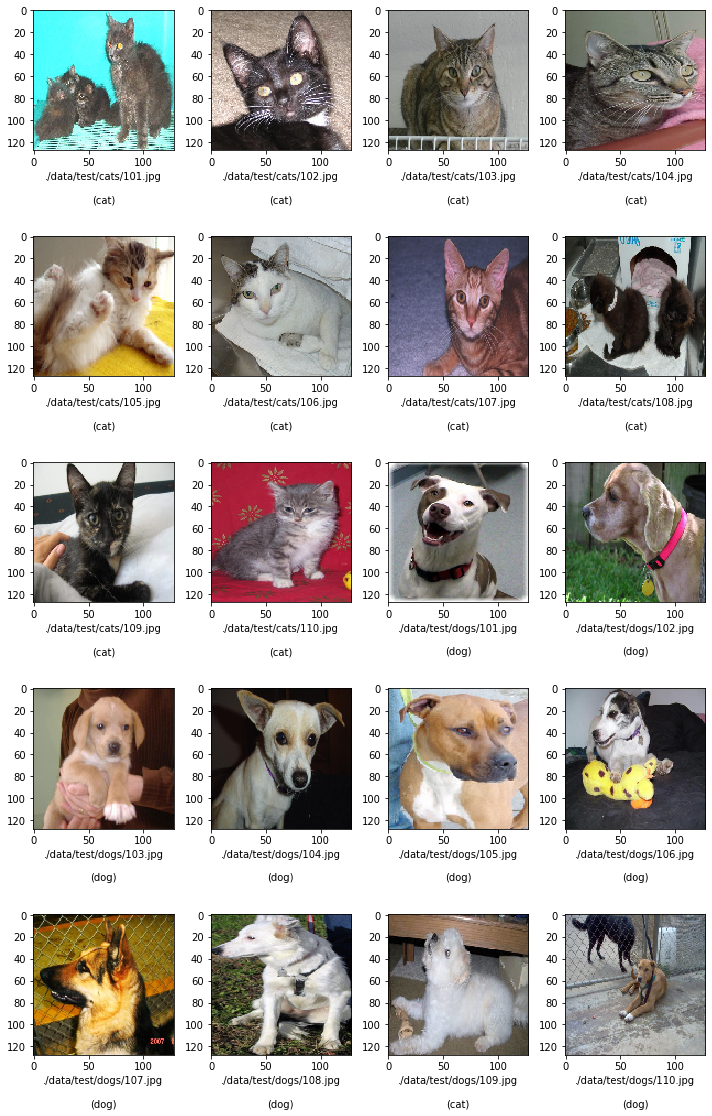

In [61]:
plt.figure(figsize=(10, 16))
for index, row in df_test.iterrows():
    filename = row['filename']
    category = row['predicted']
    img = load_img(filename, target_size=IMAGE_SIZE)
    plt.subplot(5, 4, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '\n\n' + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

<a id='comment'></a>
### A brief comment out model inaccuarcy
<p>As we can see one wrong prediction  <em>"./data/test/dogs/109.jpg"</em> <br>
    was predicted as <em>"CAT"</em>. I can tell its a <em>"DOG"</em>. <br>
    Otherwise, it accuracy is 19/20 = 95%.<\p> 

[Table of Content](#content-table)